## Importation des modules

In [105]:
import pandas as pd # pour la manipulation de dataframes
import seaborn as sns # pour la visualisation
import matplotlib.pyplot as plt # pour la visualisation
import numpy as np # manipulation de tableaux
import mplcyberpunk # thème pour matplotlib
plt.style.use('cyberpunk')


from sklearn.model_selection import train_test_split    # pour diviser les données en train et test sets

np.random.seed(42) # pour la reproductbilité des opérations aléatoires

## Lecture de la base

In [31]:
df_aliments = pd.read_csv("../data/data_clean_principal.csv")
df_aliments.head()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,...,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr
0,586.0,3.800000,1.4,NaN,NaN,16.200000,0.5,1.5,9.3,0.60,...,France,NaN,400 g,NaN,NaN,NaN,NaN,NaN,NaN,a
1,1665.0,2.700000,0.6,NaN,NaN,12.766667,3.3,4.6,12.0,1.11,...,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a
2,452.0,1.600000,0.9,NaN,NaN,9.333333,1.3,0.8,4.3,0.45,...,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a
3,155.0,0.500000,0.1,NaN,NaN,5.900000,5.5,3.0,0.7,0.25,...,France,"i sont full'/ s, . tt to it values kcal \fatiò...",NaN,1.0,[ i-sont-full-s -> fr:i-sont-full-s ] [ i-s...,en:e400,E400 - Acide alginique,0.0,0.0,a
4,586.0,0.366667,1.0,NaN,NaN,5.800000,6.0,3.0,5.0,0.09,...,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a


<AxesSubplot:title={'center':'Heatmap des données manquantes'}>

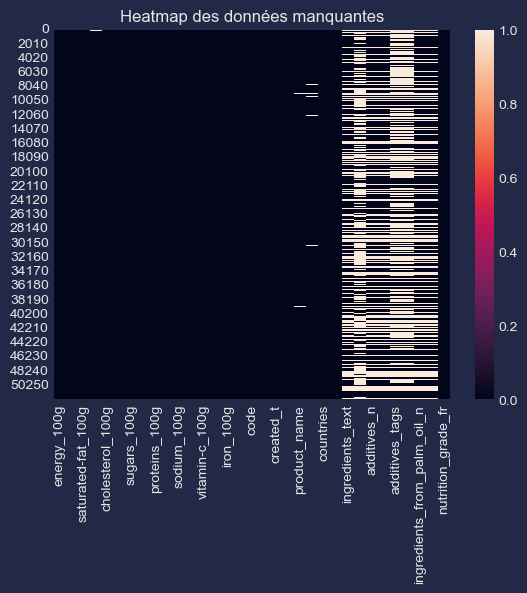

In [32]:
plt.figure()
plt.title("Heatmap des données manquantes")
sns.heatmap(df_aliments.isna())

On va retirer les colonnes avec trop de données manquantes pour éviter une trop grande perte de données

In [33]:
# suppresion des colones avec trop de données manquantes
df_aliments.drop(labels=["ingredients_text", "additives_n", "additives_tags", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"], axis=1, inplace=True)
# suppression des na restants
df_aliments.dropna(inplace=True)
# suppression des doublons
df_aliments.drop_duplicates(inplace=True)

In [46]:
df_aliments.info() # informations globales sur le dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12878 entries, 173 to 52235
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   energy_100g              12878 non-null  float64
 1   fat_100g                 12878 non-null  float64
 2   saturated-fat_100g       12878 non-null  float64
 3   trans-fat_100g           12878 non-null  float64
 4   cholesterol_100g         12878 non-null  float64
 5   carbohydrates_100g       12878 non-null  float64
 6   sugars_100g              12878 non-null  float64
 7   fiber_100g               12878 non-null  float64
 8   proteins_100g            12878 non-null  float64
 9   salt_100g                12878 non-null  float64
 10  sodium_100g              12878 non-null  float64
 11  vitamin-a_100g           12878 non-null  float64
 12  vitamin-c_100g           12878 non-null  float64
 13  calcium_100g             12878 non-null  float64
 14  iron_100g           

## Récupération des données de type numérique + variable d'intérêt (nutriscore)

In [99]:
# On récupère toutes les colonnes ne contenant que des valeurs numériques pour servir de variables explicatives
liste_variables_quantitatives = df_aliments.select_dtypes(include=['number']).columns.tolist()

# notre dataframe final contient les variables quantitatives et la variable d'intérêt "nutrition_grade_fr"
df_aliments_quantitatif = df_aliments[liste_variables_quantitatives + ["nutrition_grade_fr"]]

# On code chaque nutriscore en attribuant la plus grande valeur à a (4), puis b (3)...
l = list(df_aliments["nutrition_grade_fr"].unique())
l.sort(reverse=True)
nutri_code = {score.lower() : i for i, score in enumerate(l)}

# on enregistre les codes pour réutilisation
df_nutri_code = pd.DataFrame(list(nutri_code.items()), columns=['Lettre', 'Valeur'])
df_nutri_code.to_csv("../data/nutri_code.csv", index=False)

# passage des lesttres aux codes pour les scores
df_aliments_quantitatif["nutrition_grade_fr"] = df_aliments_quantitatif["nutrition_grade_fr"].apply(lambda x: nutri_code[x])
df_aliments_quantitatif.rename(columns={"nutrition_grade_fr" : "score"}, inplace=True)

# sauvegerde de la nouvelle bdd
df_aliments_quantitatif.to_csv("../data/data_clean.csv", index=False)

C:\Users\jaure\AppData\Local\Temp\ipykernel_12448\2150274614.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aliments_quantitatif["nutrition_grade_fr"] = df_aliments_quantitatif["nutrition_grade_fr"].apply(lambda x: nutri_code[x])
C:\Users\jaure\AppData\Local\Temp\ipykernel_12448\2150274614.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aliments_quantitatif.rename(columns={"nutrition_grade_fr" : "score"}, inplace=True)


## Visualisation sur les données pré-traitées

### Répartition des scores

Text(0.5, 0, 'Score')

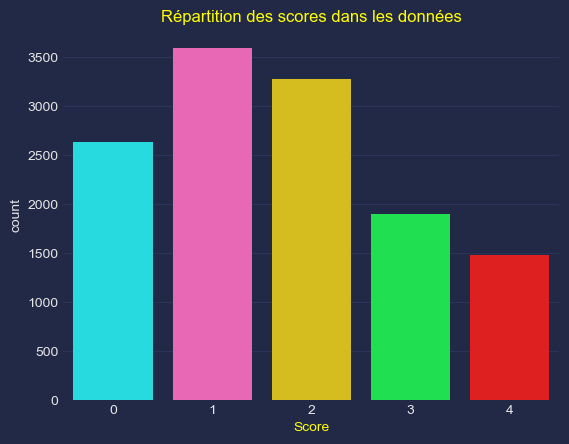

In [98]:
plt.figure()
plt.title("Répartition des scores dans les données", color = "yellow")
sns.countplot(df_aliments_quantitatif, x='nutrition_grade_fr')
plt.xlabel("Score", color="yellow")

### Equilibrage des données

In [101]:
# On compte le nombre d'observation par classe
counts = df_aliments_quantitatif['score'].value_counts()
# on récupère le min
min_samples = counts.min()

# on crée un nouveau dataframe pour contenir les données équilibrées
df_aliments_eq = pd.DataFrame()
# on fait uun rééchantillonage en fixant le nombre d'observations par classe au min calculé précédemment
for label in counts.index:
    subset = df_aliments_quantitatif[df_aliments_quantitatif['score'] == label].sample(min_samples, random_state=42) # chaque échantillon est tiré aléatoirement et de manière reproductible avec le random seed
    df_aliments_eq = pd.concat([df_aliments_eq, subset], axis=0) # on joint les données en lignes


Text(0.5, 0, 'Score')

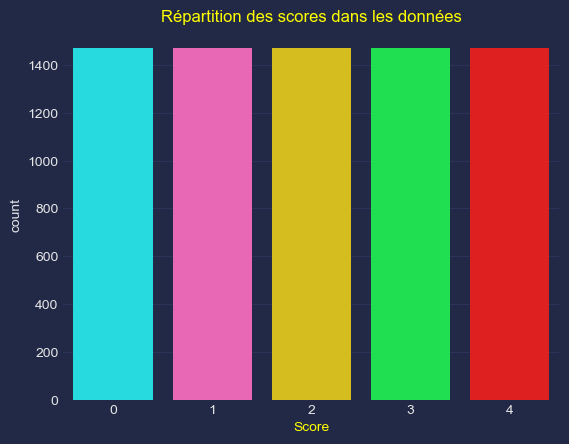

In [103]:
plt.figure()
plt.title("Répartition des scores dans les données", color = "yellow")
sns.countplot(df_aliments_eq, x='score')
plt.xlabel("Score", color="yellow")

### Séparation en données de train et de test

In [108]:
df_aliments_train, df_aliments_test = train_test_split(df_aliments_eq, train_size=0.8, random_state = 42)
df_aliments_train.to_csv("../data/train.csv", index=False)
df_aliments_test.to_csv("../data/test.csv", index=False)